<a href="https://colab.research.google.com/github/Abinayak03/Machine_learning/blob/main/central_limit_theorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Central Limit Theorm Tutorial</h1>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Say a solar company has surveyed 50 people each in total 207 cities in India to collect their average monthly electricity bill. This data is available in bill_survey file

In [ ]:
df = pd.read_csv("bill_survey.csv")
df.head()

,City,Bill
0,Mumbai,15400
1,Mumbai,6700
2,Mumbai,16300
3,Mumbai,2100
4,Mumbai,4600


In [ ]:
df.shape

(10350, 2)

In [ ]:
# Print total number of cities
df.City.nunique()

207

Total 207 cities. Each city has 50 samples. Which means total rows in a data frame = 207*50 = 10350

Now plot  a distribution of all the samples. We can see from the below that it is a right skewed distribution

### Plot distribution for all the samples data for all cities

<Axes: xlabel='Bill', ylabel='Count'>

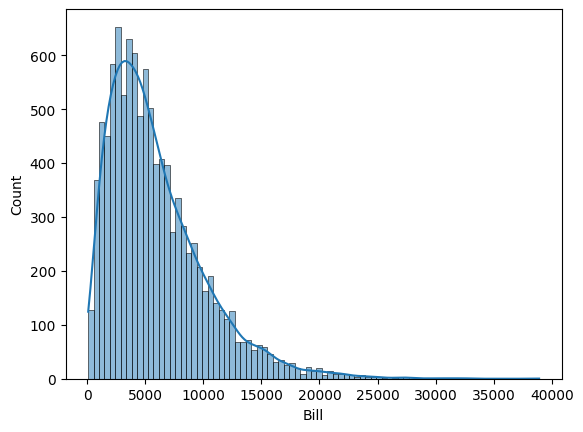

In [ ]:
sns.histplot(df.Bill, kde=True)

### Plot sample distribution for few individual cities

<Axes: xlabel='Bill', ylabel='Count'>

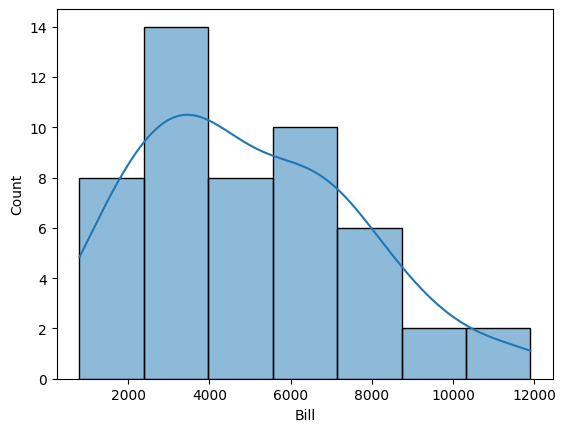

In [ ]:
sns.histplot(df[df.City=="Kolkata"].Bill, kde=True)

<Axes: xlabel='Bill', ylabel='Count'>

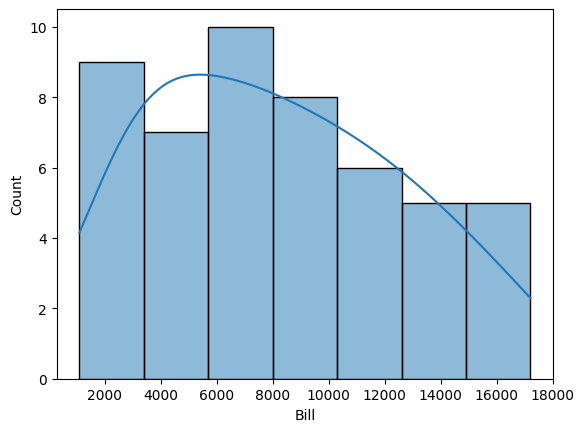

In [ ]:
sns.histplot(df[df.City=="Surat"].Bill, kde=True)

### Plot a sampling distribution of means now

In [ ]:
g = df.groupby("City")

sample_means = []

for city, subdf in g:
    sample_means.append(subdf.Bill.mean())

sample_means[:5]

[6276.0, 6084.0, 5990.0, 5588.0, 5680.0]

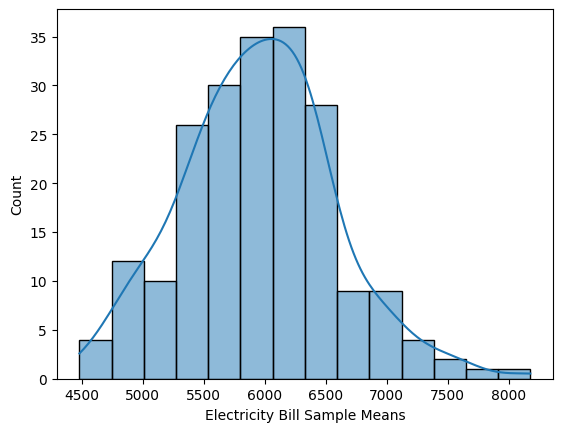

In [ ]:
sns.histplot(sample_means, kde=True)

plt.xlabel("Electricity Bill Sample Means")
plt.show()

You can see that even though original distribution is right skewed, the sampling distribution is normal

### Generate a different type of distribution (not right skewed)

In [3]:
import numpy as np
import seaborn as sns
sample_size = 1000
total_samples = 2000

def get_random_sample(sample_size):
    # generate two normal distributions with means that are far apart and merge them
    mean_1, std_dev_1 = np.random.randint(100,300),  np.random.randint(20, 80)
    mean_2, std_dev_2 = np.random.randint(700,900), np.random.randint(80, 200)
    left = np.random.normal(mean_1, std_dev_1, size=(int(sample_size/2),))
    right = np.random.normal(mean_2, std_dev_2, size=(sample_size-left.shape[0],))
    data = np.append(left, right)
    return data

for i in range(total_samples):
    if i==0:
        data = get_random_sample(sample_size)
    else:
        new_sample = get_random_sample(sample_size)
        data = np.vstack((data, new_sample))

data.shape

(2000, 1000)

<Axes: ylabel='Count'>

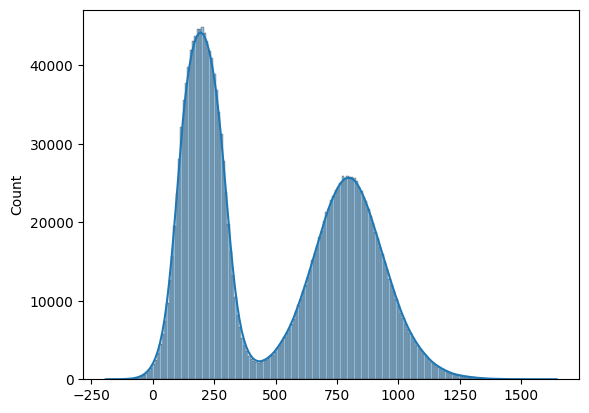

In [4]:
sns.histplot(data.flatten(), kde=True)

It looks like a random distribution as if two normal distributions are merged together. Now plot individual sample distributions

<Axes: ylabel='Count'>

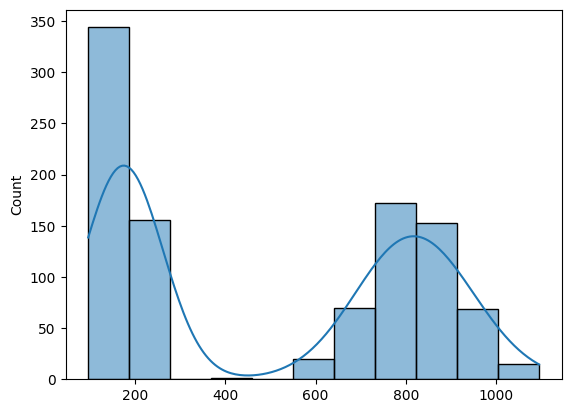

In [5]:
sns.histplot(data[0], kde=True)

<Axes: ylabel='Count'>

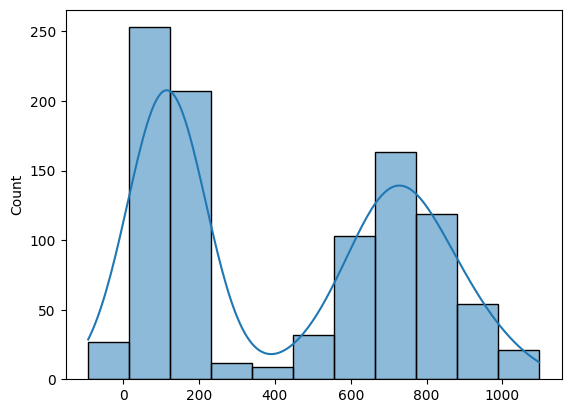

In [6]:
sns.histplot(data[1], kde=True)

### Plot sampling distribution of means now

<Axes: ylabel='Count'>

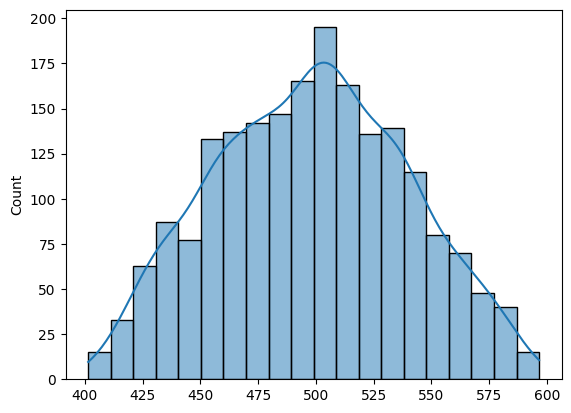

In [7]:
sample_means = []

for sample in data:
    sample_means.append(sample.mean())

sns.histplot(sample_means, kde=True)

Once again, even though the original distribution was not normal, the sampling distribution is normal. This is the basic premise of Central Limit Theorem (CLT)